**강사: 멀티캠퍼스 강선구 (sunku0316.kang@multicampus.com)**

In [1]:
import pandas as pd # DataFrame Library
import numpy as np # 수치 연선 Library
import scipy # 과학수학 Library
import sklearn # Scikit-Learn(scipy Machine Learning) Library
import statsmodels # 통계모델 Library

import sys # 시스템 정보 Library

# Python 버젼 및 빌드 환경을 가져 옵니다.
print(sys.version)

# Library 명과 버젼을 출력합니다.
for i in [pd, np, scipy, sklearn, statsmodels]:
    print(i.__name__, i.__version__)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
pandas 1.5.3
numpy 1.23.5
scipy 1.11.2
sklearn 1.2.2
statsmodels 0.14.0


# 데이터 처리(Data processing)

**DataFrame**: 인덱스(행), 컬럼(열)와 값(Value)으로 이루어진 데이터셋

  수학에서는 Matrix
  
  엑셀에서는 Sheet


**Series**: 인덱스(행)에 대한 값(Value)으로 이루어진 데이터셋

  수학에서는 Vector
  
  
**csv 파일**(Comma-separated values) File: 콤마로 값을 구분하여 DataFrame을 저장한 파일

In [2]:
import pandas as pd # Pandas library를 불러와서 약어로 pd라고 칭합니다. 관습상 pd로 칭합니다.

In [ ]:
!wget https://raw.githubusercontent.com/sunkusun9/prods_asso/main/dataset_v4.csv

In [5]:
!head dataset_v4.csv

name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
hkd103,910215-2,F,150.2,30,A,B,A,3290,1915,L
hkd104,990623-1,M,176,22,A,B,A,3750,2375,L
hkd105,980717-2,F,163.4,23,B,B,B,3080,1330,m
hkd106,970818-1,M,186.3,24,AB,B,C,3110,2360,m


In [6]:
# dataset_v4.csv 파일을 불러옵니다.
df = pd.read_csv('dataset_v4.csv')
# 첫 번째 5행을 가져옵니다.
df.head(5)

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


In [7]:
# DataFrame의 형태(행의 수, 열의 수)를 보입니다
df.shape

(250, 11)

In [8]:
# 데이터프레임의 컬럼 정보를 출력합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    250 non-null    object 
 1   social_security_number  250 non-null    object 
 2   gender                  250 non-null    object 
 3   height                  250 non-null    float64
 4   age                     250 non-null    int64  
 5   blood_type              250 non-null    object 
 6   company                 250 non-null    object 
 7   grades                  250 non-null    object 
 8   salary                  250 non-null    int64  
 9   expenditure             250 non-null    int64  
 10  car_type                250 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 21.6+ KB


**object**: 오브젝트 (보통 문자열)

**floatXX**: 실수형 (XX 비트수)  - float64 는 64비트 실수

**intXX**: 정수형 (XX 비트수) - int64는 64비트 정수

**datetimeXX**: 일자형 - datetime64 는 64비트 일자형

In [9]:
# 기술(descriptive) 통계량
df.describe()

,height,age,salary,expenditure
count,250.000000,250.000000,250.000000,250.000000
mean,169.569200,39.240000,6357.480000,4971.480000
std,12.283857,8.653899,1849.791383,1861.112508
min,148.100000,20.000000,3080.000000,1330.000000
25%,159.300000,33.000000,5002.500000,3593.750000
50%,168.750000,39.000000,6100.000000,4762.500000
75%,180.375000,46.000000,7427.500000,6272.500000
max,191.800000,55.000000,11990.000000,10865.000000


In [10]:
# mean 평균
# median 중앙값
# var 분산 (표본분산)
# std 표준편차 (표본표준편차)
# skew 왜도
# kurt 첨도
df.agg(['mean', 'median', 'var', 'std', 'skew', 'kurt'])

<ipython-input-10-c192e162edc9>:7: FutureWarning: ['name', 'social_security_number', 'gender', 'blood_type', 'company', 'grades', 'car_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean', 'median', 'var', 'std', 'skew', 'kurt'])


,height,age,salary,expenditure
mean,169.569200,39.240000,6.357480e+03,4.971480e+03
median,168.750000,39.000000,6.100000e+03,4.762500e+03
var,150.893144,74.889960,3.421728e+06,3.463740e+06
std,12.283857,8.653899,1.849791e+03,1.861113e+03
skew,0.000271,-0.077071,7.506557e-01,6.444998e-01
kurt,-1.108311,-0.789495,3.840889e-01,1.793490e-01


In [12]:
# pd.DataFrame.select_dtypes: DataFrame에서 dype으로 열을 가져옵니다. df.select_dtype('number') 수치형 컬럼을  가져옵니다.
# pd.DataFrame.apply: 행단위로(axis=0) 또는 열단위(axis=1) 연산을 취합니다.
# df.apply(lambda x: x.quantile([0, 0.25, 0.5, 0.75, 1.0]))
# pd.Sereis.quantile 분위수를 구합니다.

# 수치형 컬럼만 가져와서 각 컬럼의 0퍼센틸(최소값), 25퍼센틸(일사분위), 5퍼센틸(이사분위, 중앙값), 75퍼센틸(삼사분위), 100퍼센틸(최대값)
df.select_dtypes('number').apply(lambda x: x.quantile([0, 0.25, 0.5, 0.75, 1.0]), axis=0)

,height,age,salary,expenditure
0.00,148.100,20.0,3080.0,1330.00
0.25,159.300,33.0,5002.5,3593.75
0.50,168.750,39.0,6100.0,4762.50
0.75,180.375,46.0,7427.5,6272.50
1.00,191.800,55.0,11990.0,10865.00


In [14]:
# pd.Series.value_counts() 범주값의 출현 빈도를 구합니다.
df['car_type'].value_counts()

m     148
L      79
S      21
SS      2
Name: car_type, dtype: int64

<AxesSubplot:>

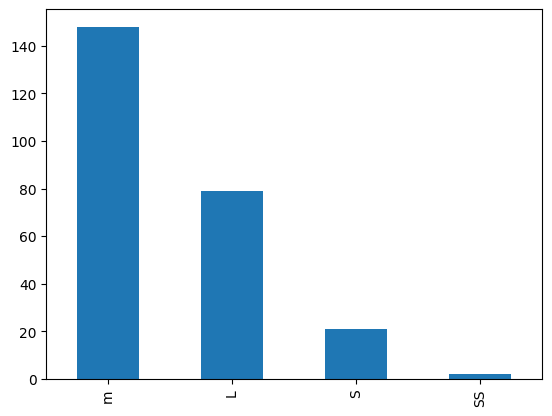

In [ ]:
df['car_type'].value_counts().plot(kind='bar')

**인덱싱**

데이터를 인덱스 기반으로 탐색

**iloc**: 포지션 기반 인덱싱 (0-Base, 첫번째 위치가 0)

**loc**: 인덱스 기반 인덱싱

  ※ Boolean Indexing: 행의 선택여부를 나타내는 Series를 이용한 인덱싱

In [51]:
# 위 결과를 보아 name이 중복해서 등장하는 것은 없습니다,.
df2 = df.set_index('name')
df2

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
...,...,...,...,...,...,...,...,...,...,...
hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L
hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,m


**df2**로 작업을 합니다.

In [52]:
# 첫번째 행을 들고 옵니다.
df2.iloc[0]

social_security_number    990623-2
gender                           F
height                       161.9
age                             22
blood_type                       A
company                          A
grades                           A
salary                        4100
expenditure                   1975
car_type                         L
Name: hkd1, dtype: object

In [53]:
# 마지막 행을 들고 옵니다.
df2.iloc[-1]

social_security_number    691115-2
gender                           F
height                       152.6
age                             54
blood_type                       B
company                          A
grades                           B
salary                        7470
expenditure                   6095
car_type                         m
Name: hkd99, dtype: object

In [54]:
# 첫번째 행과 3번째행을 들고 온다

df2.iloc[[0, 2]]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m


In [55]:
# 인덱스(name)이 hkd102, hkd98 를 가져옵니다.

df2.loc[['hkd102', 'hkd98']]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
hkd98,701024-1,M,166.7,53,O,A,B,8760,7385,m


**Slicing**: 구간 단위로 인덱싱을 합니다.

**iloc**
    
(첫번째 위치):(마지막 위치: 첫번째 위치에서 마지막 위치 이전까지(마지막 위치 미포함) 가져옵니다.

**loc**

(첫번째 인덱스):(마지막 인덱스): 첫번째 인덱스 에서 마지막 인덱스 이전까지(마지막 인덱스 포함) 가져옵니다.

In [56]:
# 위치가 0에서 2까지(2 포함) 가져옵니다.

df2.iloc[:3]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m


In [57]:
# 위치가 1에서 마지막전까지 (마지막 미포험)까지 가져옵니다.
df2.iloc[1:-1]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
hkd103,910215-2,F,150.2,30,A,B,A,3290,1915,L
...,...,...,...,...,...,...,...,...,...,...
hkd94,720614-1,M,174.1,49,O,A,B,8540,7165,m
hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L


In [58]:
# 위치가 1에서 마지막까지 (마지막 포험)까지 가져옵니다.
df2.iloc[1:]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
hkd103,910215-2,F,150.2,30,A,B,A,3290,1915,L
...,...,...,...,...,...,...,...,...,...,...
hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L
hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,m


In [59]:
# 이름이 인덱스 순으로 hkd1에서 hkd99까지 들고 옵니다.

df2.loc['hkd1':'hkd99']

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
...,...,...,...,...,...,...,...,...,...,...
hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L
hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,m


**컬럼 인덱싱**

In [60]:
# 첫번쩨 컬럼과 세번째 컬럼(포함)까지 옵니다.
df2.iloc[:, 0:3]

,social_security_number,gender,height
name,,,
hkd1,990623-2,F,161.9
hkd10,900303-2,F,169.4
hkd100,681205-2,F,168.3
hkd101,931226-2,F,155.3
hkd102,920123-1,M,188.6
...,...,...,...
hkd95,730710-2,F,157.8
hkd96,720805-2,F,150.4
hkd97,710929-1,M,172.4


In [61]:
# 행은 hkd1에서 hkd101까지(포함) gender에서 height(포함)까지 들고 옵니다.

df2.loc['hkd1': 'hkd101', 'gender':'height']

,gender,height
name,,
hkd1,F,161.9
hkd10,F,169.4
hkd100,F,168.3
hkd101,F,155.3


In [62]:
# Boolean Indexing 혈액형이 'A'인 행만 들고 옵니다.

#  blood_type 이 'A'인지를 나타내는 Boolean Index(Series)
df2['blood_type'] == 'A'

name
hkd1       True
hkd10      True
hkd100     True
hkd101    False
hkd102    False
          ...  
hkd95      True
hkd96     False
hkd97      True
hkd98     False
hkd99     False
Name: blood_type, Length: 250, dtype: bool

In [63]:
# Boolean Indexing
df2.loc[df2['blood_type'] == 'A']

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd103,910215-2,F,150.2,30,A,B,A,3290,1915,L
hkd104,990623-1,M,176.0,22,A,B,A,3750,2375,L
...,...,...,...,...,...,...,...,...,...,...
hkd86,801119-2,F,151.3,41,A,A,A,5650,3525,L
hkd88,780115-2,F,150.6,43,A,A,B,5640,4265,m
hkd91,750423-1,M,170.7,46,A,A,F,6920,6420,S


In [64]:
# 혈액형이 A형이면서 나이가 25세 이하

df2.loc[(df2['blood_type'] == 'A') & (df2['age'] <= 25)] # & : and, | : or, 조건문을 ()로 묶어서 연산 우선순위에 의한 오작동을 하지 않게 한다

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd104,990623-1,M,176.0,22,A,B,A,3750,2375,L
hkd205,990624-2,F,160.3,22,A,C,A,5040,2915,L
hkd223,990625-1,M,169.3,22,A,C,B,4970,3220,m
hkd247,000526-3,M,189.4,20,A,C,B,5540,4165,m


In [65]:
df2.loc[(df2['blood_type'] == 'A') | (df2['age'] <= 25)] # or

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
hkd103,910215-2,F,150.2,30,A,B,A,3290,1915,L
hkd104,990623-1,M,176.0,22,A,B,A,3750,2375,L
...,...,...,...,...,...,...,...,...,...,...
hkd86,801119-2,F,151.3,41,A,A,A,5650,3525,L
hkd88,780115-2,F,150.6,43,A,A,B,5640,4265,m
hkd91,750423-1,M,170.7,46,A,A,F,6920,6420,S


In [66]:
df.query("blood_type == 'A' or age <= 25") # Query

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
5,hkd103,910215-2,F,150.2,30,A,B,A,3290,1915,L
6,hkd104,990623-1,M,176.0,22,A,B,A,3750,2375,L
...,...,...,...,...,...,...,...,...,...,...,...
235,hkd86,801119-2,F,151.3,41,A,A,A,5650,3525,L
237,hkd88,780115-2,F,150.6,43,A,A,B,5640,4265,m
241,hkd91,750423-1,M,170.7,46,A,A,F,6920,6420,S
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L


**결측치 처리**

In [67]:
# 결측치를 만들어 봅니다.

df2.loc[df2['height'].between(160, 161) & (df2['gender'] == 'F'), 'gender'] = np.nan
df2.loc[df2['height'].between(180, 181) & (df2['gender'] == 'M'), 'gender'] = np.nan

np.random.seed(123)
df2.loc[np.random.rand(len(df2)) > 0.9, 'age'] = np.nan

df2.loc[df2['grades'] == 'A', 'grades'] = np.nan

df2.isna().sum()

social_security_number     0
gender                    12
height                     0
age                       21
blood_type                 0
company                    0
grades                    79
salary                     0
expenditure                0
car_type                   0
dtype: int64

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, hkd1 to hkd99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social_security_number  250 non-null    object 
 1   gender                  238 non-null    object 
 2   height                  250 non-null    float64
 3   age                     229 non-null    float64
 4   blood_type              250 non-null    object 
 5   company                 250 non-null    object 
 6   grades                  171 non-null    object 
 7   salary                  250 non-null    int64  
 8   expenditure             250 non-null    int64  
 9   car_type                250 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 29.6+ KB


In [69]:
df2.loc[df2['age'].isna()]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd104,990623-1,M,176.0,NaN,A,B,NaN,3750,2375,L
hkd133,720801-2,F,149.5,NaN,AB,B,B,7460,6335,m
hkd141,880509-1,NaN,180.9,NaN,B,B,C,3860,2735,m
hkd175,740515-2,F,151.3,NaN,B,B,B,6750,5375,m
hkd181,830808-2,F,149.2,NaN,O,B,NaN,5010,3635,L
hkd206,980718-1,M,165.5,NaN,B,C,B,5710,3960,m
hkd207,970819-2,NaN,160.6,NaN,AB,C,NaN,5280,3155,L
hkd210,941106-2,F,164.3,NaN,O,C,B,5950,4200,m
hkd211,931227-1,M,175.5,NaN,A,C,C,6380,5630,m


In [70]:
df2.loc[df2.isna().any(axis=1)]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,
hkd1,990623-2,F,161.9,22.0,A,A,NaN,4100,1975,L
hkd103,910215-2,F,150.2,30.0,A,B,NaN,3290,1915,L
hkd104,990623-1,M,176.0,NaN,A,B,NaN,3750,2375,L
hkd114,890419-2,F,157.5,32.0,B,B,NaN,4040,2665,L
hkd117,860617-2,F,163.0,35.0,A,B,NaN,4730,3355,L
...,...,...,...,...,...,...,...,...,...,...
hkd90,760328-1,M,172.4,45.0,B,A,NaN,7210,5835,L
hkd92,740518-2,F,170.8,NaN,B,A,B,6610,5235,m
hkd93,730719-1,NaN,180.4,48.0,AB,A,B,7560,6185,m


In [71]:
df2.loc[df2.isna().all(axis=1)]

,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
name,,,,,,,,,,


In [73]:
# gender가 결측일 때, height가 170이하이면 'F', 아니면 'M'으로 결측치를 처리한다.
# ※ 주의 loc[][]로 하면 예상치 못한 결과를 얻을 수있다는 Warning이 발생한다
# ex) df2.loc[df2['gender'].isna() & (df2['height'] <= 170)]['gender'] = 'F'

df2.loc[df2['gender'].isna() & (df2['height'] <= 170), 'gender'] = 'F'
df2.loc[df2['gender'].isna() & (df2['height'] > 170), 'gender'] = 'M'

In [74]:
# 나이의 결측치는 평균으로 대체한다.

df2['age'] = df2['age'].fillna(df2['age'].mean())

In [75]:
# grades의 결측은 A로 대체한다.

df2['grades'] = df2['grades'].fillna('A')

**그룹연산**

데이터를 주어진 기준에 따라 묶어서 연산

Ex) gender 별로 age 평균, blood_type 별 height 평균

**df**로 작업합니다.

In [76]:
# gender별 age의  평균을 구하세요

df.groupby('gender')

In [77]:
# DataFrameGroupBy에 하나의 컬럼만 지정하면
# SeriesGroupBy를 반환합니다

df.groupby('gender')['age']

In [ ]:
df.groupby('gender').mean() # 한정을 하지 않으면 mean을 구할 수 있는 컬럼에 대한 연산 결과를 반환합니다.

,height,age,salary,expenditure
gender,,,,
F,158.514286,38.857143,6138.482143,4756.785714
M,178.541304,39.550725,6535.217391,5145.724638


In [78]:
df.groupby('gender')['age'].mean()

gender
F    38.857143
M    39.550725
Name: age, dtype: float64

In [79]:
df.groupby('gender')['age'].agg('mean')

gender
F    38.857143
M    39.550725
Name: age, dtype: float64

In [81]:
# gender 별 age의 평균과 표본표준편차를 구하세요

df.groupby('gender')['age'].agg(['mean', 'std'])

,mean,std
gender,,
F,38.857143,8.637710
M,39.550725,8.685984


In [85]:
# blood_type, gender별 빈도수

df.groupby(['blood_type', 'gender']).size()

blood_type  gender
A           F         34
            M         50
AB          F         12
            M         17
B           F         31
            M         23
O           F         35
            M         48
dtype: int64

**교차 테이블** : pd.crosstab


두 개이상의 기준을

행(인덱스)과 열(컬럼)로 교차하여 묶어 결과를 뽑는다.

In [ ]:
# 행은 blood_type, 열에는 gender로 한 빈도수 데이터프레임을 구하세요.

pd.crosstab(index=df['blood_type'], columns=df['gender'])

gender,F,M
blood_type,,
A,34,50
AB,12,17
B,31,23
O,35,48


In [86]:
df.groupby(['blood_type', 'gender']).size().unstack()

gender,F,M
blood_type,,
A,34,50
AB,12,17
B,31,23
O,35,48


In [87]:
# 행은 blood_type, 열에는 gender로 하여 값은 키의 평균인  데이터프레임을 구하세요.

pd.crosstab(index=df['blood_type'], columns=df['gender'], values=df['height'], aggfunc='mean')

gender,F,M
blood_type,,
A,159.235294,178.076000
AB,156.141667,178.635294
B,157.161290,178.347826
O,159.825714,179.085417


In [ ]:
# 위와 같은 명령

df.pivot_table(index='blood_type', columns='gender', values='height', aggfunc='mean')

gender,F,M
blood_type,,
A,159.235294,178.076000
AB,156.141667,178.635294
B,157.161290,178.347826
O,159.825714,179.085417


# 통계분석

In [88]:
# 상관도 분석
# 두 연속형 변수간의 선형적인 연관성을 나타낸다.


# 피어슨 상관도 분석
from scipy.stats import pearsonr

# height와 age의 상관도를 구하세요

corr, pvalue = pearsonr(df['height'], df['age'])
corr, pvalue

(0.04040301483778817, 0.5248507562966462)

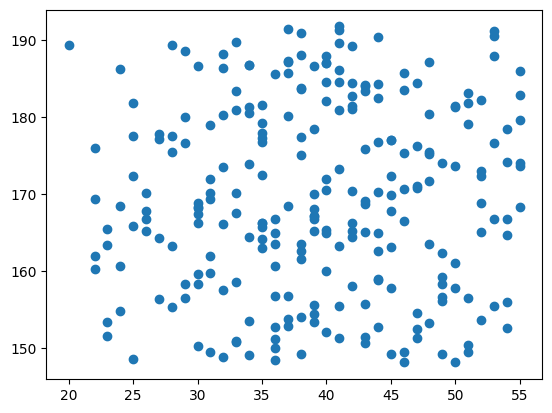

In [90]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['height'])

In [91]:
# pd.DataFrame.corr 연속형 변수간의 상관도 행렬을 구한다.

df.corr()

<ipython-input-91-d527b6df2792>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,height,age,salary,expenditure
height,1.000000,0.040403,0.048673,0.048044
age,0.040403,1.000000,0.525035,0.552832
salary,0.048673,0.525035,1.000000,0.972185
expenditure,0.048044,0.552832,0.972185,1.000000


In [95]:
# age와 상관도의 절대값이 가장 높은 연속형 변수(자기 자신은 제외)

# 1. age 가져온다.
corr_age = df.corr().loc['age']
corr_age

<ipython-input-95-c97a085009c8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_age = df.corr().loc['age']


height         0.040403
age            1.000000
salary         0.525035
expenditure    0.552832
Name: age, dtype: float64

In [96]:
# age는 제외
corr_age.loc[corr_age.index != 'age']

height         0.040403
salary         0.525035
expenditure    0.552832
Name: age, dtype: float64

In [97]:
# 가장 큰 값의 index
corr_age.loc[corr_age.index != 'age'].idxmax()

'expenditure'

In [98]:
# age와 상관도가 높은 연속형 변수 두 개
corr_age.loc[corr_age.index != 'age'].sort_values(ascending=False).iloc[:2].index

Index(['expenditure', 'salary'], dtype='object')

In [99]:
# t 검정: 두 개의 범주

# 모분산을 모를 때,범주수가 2개인 범주형 변수와 연속형 변수의 독립성 검정
# 가정: 각각의 범주의 연속형 변수는 정규분포를 따른다.
# 두 개의 집단이 등분산일 때와 등분산이 아닐 때를  구분해야 한다.

from scipy.stats import ttest_ind

In [100]:
# t 검정: 동일 샘플의 조치(treatment 이전과 이후가 독립인지)

from scipy.stats import ttest_rel

In [101]:
# t 검정 one-sample

# 단일 표본의의 모평균에 대한 검정

from scipy.stats import ttest_1samp

In [102]:
# 다음 검정을 하고, pvalue를 구하세요.
# H0: gender가 F일 때 salary와 M일 때 salary가 같다
# H1: gender가 F일 때 salary와 M일 때 salary는 같지 않다.
# 두 집단의 분산은 같다고 가정합니다.

from scipy.stats import ttest_ind
result = ttest_ind(
    df.loc[df['gender'] == 'M', 'salary'],
    df.loc[df['gender'] == 'F', 'salary'],
    equal_var=True # 등분산
)
result, result.pvalue

(TtestResult(statistic=1.6926887906997914, pvalue=0.09177053086961678, df=248.0),
 0.09177053086961678)

In [103]:
#H0: gender=='M'일 때, height의 평균은 180이다.
#H1: gender=='M'일 때, height의 평균은 180이 아니다.
from scipy.stats import ttest_1samp

result = ttest_1samp(df.loc[df['gender'] == 'M', 'salary'], 180)
result

TtestResult(statistic=40.05804926861978, pvalue=1.6214197198729868e-77, df=137)

In [104]:
from  scipy.stats import f_oneway

f_oneway(
    df.loc[df['gender'] == 'M', 'salary'],
    df.loc[df['gender'] == 'F', 'salary']
)

F_onewayResult(statistic=2.865195342160724, pvalue=0.09177053086961556)

In [105]:
df['blood_type'].value_counts()

A     84
O     83
B     54
AB    29
Name: blood_type, dtype: int64

In [106]:
# blood_type에 따라 salary의 평균이 동일 여부를 검정해 보세요.

f_oneway(
    df.loc[df['blood_type'] == 'A', 'salary'],
    df.loc[df['blood_type'] == 'B', 'salary'],
    df.loc[df['blood_type'] == 'AB', 'salary'],
    df.loc[df['blood_type'] == 'O', 'salary'],
)

F_onewayResult(statistic=0.11567771582991601, pvalue=0.9508624032244534)

In [ ]:
# groupby를 이용한 팁

df.groupby('blood_type')['salary'].agg(list)

blood_type
A     [4100, 4720, 7280, 3290, 3750, 3410, 3460, 354...
AB    [4060, 3110, 5230, 5080, 6250, 7460, 4580, 613...
B     [3080, 4820, 3260, 4040, 6060, 6050, 7000, 742...
O     [4390, 3230, 3420, 4370, 4590, 4950, 5660, 571...
Name: salary, dtype: object

In [ ]:
df.groupby('blood_type')['salary'].agg(list).tolist()

[[4100,
  4720,
  7280,
  3290,
  3750,
  3410,
  3460,
  3540,
  4730,
  4450,
  6130,
  6210,
  7000,
  7250,
  7430,
  8460,
  5070,
  3680,
  4920,
  5110,
  5920,
  5840,
  7330,
  3980,
  5440,
  4770,
  4850,
  5480,
  6110,
  6660,
  5420,
  6130,
  5380,
  6300,
  4770,
  6090,
  5260,
  5760,
  4500,
  5750,
  7680,
  5040,
  5740,
  6380,
  6930,
  8570,
  11180,
  4970,
  5710,
  6070,
  7120,
  6900,
  10410,
  9380,
  11120,
  11990,
  5540,
  6770,
  6680,
  8220,
  9430,
  4760,
  4970,
  5460,
  6200,
  4550,
  6020,
  7540,
  6860,
  8100,
  4750,
  6370,
  8850,
  4630,
  6830,
  9300,
  8870,
  8110,
  9310,
  5650,
  5640,
  6920,
  6990,
  8000],
 [4060,
  3110,
  5230,
  5080,
  6250,
  7460,
  4580,
  6130,
  3600,
  5830,
  4800,
  5510,
  6420,
  9170,
  5280,
  6610,
  8530,
  5210,
  8450,
  11080,
  4420,
  7950,
  5100,
  6530,
  7230,
  5640,
  8730,
  5270,
  7560],
 [3080,
  4820,
  3260,
  4040,
  6060,
  6050,
  7000,
  7420,
  3530,
  3860,
  5440,
 

In [107]:
# python unpacking 연산자를 이용해 위 내용을 전달
f_oneway(
    *df.groupby('blood_type')['salary'].agg(list).tolist()
)

F_onewayResult(statistic=0.11567771582991603, pvalue=0.9508624032244534)

In [108]:
# 카이제곱 검정

# blood_type과 gender간의 독립성을 검정하세요.
from scipy.stats import chi2_contingency

# 빈도수 테이블을 구합니다.
pd.crosstab(index=df['blood_type'], columns=df['gender'])

gender,F,M
blood_type,,
A,34,50
AB,12,17
B,31,23
O,35,48


In [ ]:
# 빈도수 테이블을 chi2_contingency에 전달합니다.
chi2_contingency(
    pd.crosstab(index=df['blood_type'], columns=df['gender'])
) # 검정통계량, pvalue, 자유도, 예상빈도수

(4.47542396220999,
 0.2144929172292572,
 3,
 array([[37.632, 46.368],
        [12.992, 16.008],
        [24.192, 29.808],
        [37.184, 45.816]]))

**statsmodels를 통한 선형회귀분석**

In [109]:
from statsmodels.formula.api import ols

In [110]:
# 종속변수 : expenditure
# 독립변수 : 연속형 - height, age, salary, 범주형 - gender
# ~을 기준으로 좌항에는 종속변수, 우항에는 독립변수 - 범주형일 경우: C(범주명)
lm = ols('expenditure ~ height + age + salary + C(gender)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1108.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.43e-155
Time:                        11:03:43   Log-Likelihood:                -1867.8
No. Observations:                 250   AIC:                             3746.
Df Residuals:                     245   BIC:                             3763.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1467.0224    619.795     -2.367      0.019   -2687.829    -246.216
C(gender)[T.M]    14.5107     94.433      0.154      0.878    -171.492     200.514
height            -0.4986      3.813     -0.131      0.896      -8.009       7.012
age               12.6223      3.701      3.410      0.001       5.332      19.912
salary             0.9469      0.017     54.304      0.000       0.913       0.981
==============================================================================
Omnibus:                        2.871   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.103
Skew:                          -0.010   Prob(JB):                        0.349
Kurtosis:                       2.551   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
df[['height', 'age', 'salary', 'gender', 'expenditure']]

,height,age,salary,gender,expenditure
0,161.9,22,4100,F,1975
1,169.4,31,4720,F,2970
2,168.3,55,7280,F,5905
3,155.3,28,4060,F,2935
4,188.6,29,4390,M,4015
...,...,...,...,...,...
245,157.8,50,6990,F,4865
246,150.4,51,7110,F,4985
247,172.4,52,8000,M,6625
248,166.7,53,8760,M,7385


In [113]:
pd.get_dummies(df[['height', 'age', 'salary', 'blood_type', 'expenditure']], columns=['blood_type'])

,height,age,salary,expenditure,blood_type_A,blood_type_AB,blood_type_B,blood_type_O
0,161.9,22,4100,1975,1,0,0,0
1,169.4,31,4720,2970,1,0,0,0
2,168.3,55,7280,5905,1,0,0,0
3,155.3,28,4060,2935,0,1,0,0
4,188.6,29,4390,4015,0,0,0,1
...,...,...,...,...,...,...,...,...
245,157.8,50,6990,4865,1,0,0,0
246,150.4,51,7110,4985,0,0,0,1
247,172.4,52,8000,6625,1,0,0,0
248,166.7,53,8760,7385,0,0,0,1


In [114]:
# 가변수화로 인해 발생하는 완전한 다중공선성을 제거하기 위해 첫번째 범주를 제외
df_dummy = pd.get_dummies(df[['height', 'age', 'salary', 'gender', 'expenditure']], columns=['gender'], drop_first=True)
df_dummy

,height,age,salary,expenditure,gender_M
0,161.9,22,4100,1975,0
1,169.4,31,4720,2970,0
2,168.3,55,7280,5905,0
3,155.3,28,4060,2935,0
4,188.6,29,4390,4015,1
...,...,...,...,...,...
245,157.8,50,6990,4865,0
246,150.4,51,7110,4985,0
247,172.4,52,8000,6625,1
248,166.7,53,8760,7385,1


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = ['height', 'age', 'salary', 'gender_M']
reg_lr = LinearRegression()
reg_lr.fit(df_dummy[X], df_dummy['expenditure'])
r2_score(df_dummy['expenditure'], reg_lr.predict(df_dummy[X]))

0.947630331409417